### Normal equations

In [1]:
import numpy as np

x1s = [     3,      2,      4,      2,      3,      2,      5,      4]  # bedrooms
x2s = [     2,      1,      3,      1,      2,      2,      3,      2]  # bathrooms
ys  = [48_800, 44_300, 53_800, 44_200, 49_700, 44_900, 58_400, 52_900]  # price

x1 = np.array(x1s)
x2 = np.array(x2s)
y  = np.array(ys)

In [2]:
n        = len(ys)
sum_x1   = np.sum(x1)
sum_x2   = np.sum(x2)
sum_y    = np.sum(y)
sum_x1y  = np.sum(x1*y)
sum_x2y  = np.sum(x2*y)
sum_x1x1 = np.sum(x1*x1)
sum_x2x2 = np.sum(x2*x2)
sum_x1x2 = np.sum(x1*x2)

n, sum_x1, sum_x2, sum_y, sum_x1y, sum_x2y, sum_x1x1, sum_x2x2 , sum_x1x2

(8, 25, 16, 397000, 1281100, 817700, 87, 36, 55)

In [3]:
# The system of normal equations
eqn1 = np.array([n, sum_x1, sum_x2, sum_y])
eqn2 = np.array([sum_x1, sum_x1x1, sum_x1x2, sum_x1y])
eqn3 = np.array([sum_x2, sum_x1x2, sum_x2x2, sum_x2y])

eqn1, eqn2, eqn3

(array([     8,     25,     16, 397000]),
 array([     25,      87,      55, 1281100]),
 array([    16,     55,     36, 817700]))

### Solve for β0, β1, and β2

In [4]:
# Eliminate β0 from eqn3.
eqn3 = eqn3 - 2*eqn1

eqn1, eqn2, eqn3

(array([     8,     25,     16, 397000]),
 array([     25,      87,      55, 1281100]),
 array([    0,     5,     4, 23700]))

In [5]:
# Eliminate β0 from eqn2.
eqn2 = 25*eqn1 - 8*eqn2

eqn1, eqn2, eqn3

(array([     8,     25,     16, 397000]),
 array([      0,     -71,     -40, -323800]),
 array([    0,     5,     4, 23700]))

In [6]:
# Eliminate β1 from eqn3.
eqn3 = 5*eqn2 + 71*eqn3

eqn1, eqn2, eqn3

(array([     8,     25,     16, 397000]),
 array([      0,     -71,     -40, -323800]),
 array([    0,     0,    84, 63700]))

In [7]:
β2 = 63700/84
β2

758.3333333333334

In [8]:
β1 = (323800 - 40*β2)/71
β1

4133.333333333334

In [9]:
β0 = (397000 - 25*β1 - 16*β2)/8
β0

35191.666666666664

In [10]:
print(f'β0 = {β0:9,.2f}')
print(f'β1 = {β1:9,.2f}')
print(f'β2 = {β2:9,.2f}')

β0 = 35,191.67
β1 =  4,133.33
β2 =    758.33


In [11]:
import numpy as np

A = np.array([[ 8, 25, 16],
              [25, 87, 55],
              [16, 55, 36]])

b = np.array([397_000, 1_281_100, 817_700])

solution = np.linalg.solve(A, b)
solution

array([35191.66666667,  4133.33333333,   758.33333333])

### Predict home prices

In [12]:
def home_price(β0, β1, β2, x1, x2):
    """
    Estimate the price of a house.
    @param β0, β1, β2 the regression coefficients.
    @param x1 the number of bedrooms
    @param x2 the number of bathrooms
    @return the estimated price.
    """
    return β0 + β1*x1 + β2*x2

In [13]:
x1 = 2  # bedrooms
x2 = 1  # bathrooms

y_hat = home_price(β0, β1, β2, x1, x2)
print(f'Estimated price for a house with {x1} bedrooms and {x2} bathrooms is ${y_hat:,.2f}')

Estimated price for a house with 2 bedrooms and 1 bathrooms is $44,216.67


In [14]:
x1 = 5  # bedrooms
x2 = 3  # bathrooms

y_hat = home_price(β0, β1, β2, x1, x2)
print(f'Estimated price for a house with {x1} bedrooms and {x2} bathrooms is ${y_hat:,.2f}')

Estimated price for a house with 5 bedrooms and 3 bathrooms is $58,133.33


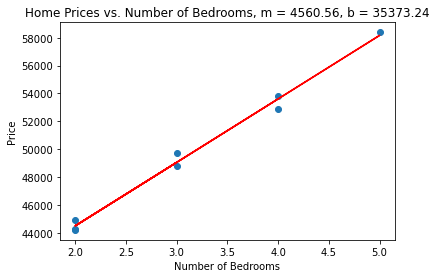

In [15]:
%matplotlib inline
import LeastSquaresLine as lsl

lsl.show_least_squares_line("Home Prices vs. Number of Bedrooms", 
                            "Number of Bedrooms", "Price", x1s, ys)

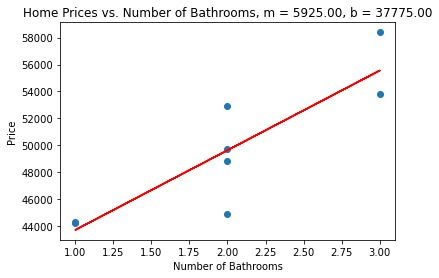

In [16]:
%matplotlib inline
import LeastSquaresLine as lsl

lsl.show_least_squares_line("Home Prices vs. Number of Bathrooms", 
                            "Number of Bathrooms", "Price", x2s, ys)